<h1 style="color:navy;text-align:center;">Jogos do gênero Shooter mais vendidos para PlayStation entre 2010 e 2016</h1>

Neste notebook, vamos utilizar uma base de dados de venda de Video Games para identificar quais foram os jogos estilo shooter mais vendidos entre os anos de 2010 e 2016 para a plataforma PlayStation.

Antes de tudo, vamos entender nosso dataset:

## 1. Lendo o arquivo

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Lendo o arquivo .csv
dataset = pd.read_csv ("/kaggle/input/videogamesales/vgsales.csv")
dataset.shape


/kaggle/input/videogamesales/vgsales.csv


(16598, 11)

Nossa base de dados possui 16.598 linhas e 11 colunas.

Abaixo, estão as informações presentes em cada coluna:
* **Rank**: Ranking de vendas no geral.
* **Name**: Nome do jogo.
* **Platform**: Plataforma de lançamento.
* **Year**: Ano de lançamento.
* **Genre**: Gênero do jogo.
* **Publisher**: Empresa que publicou o jogo.
* **NA_Sales**: Vendas na América do Norte (em milhões).
* **EU_Sales**: Vendas na Europa (em milhões).
* **JP_Sales**: Vendas no Japão (em milhões).
* **Other_Sales**: Vendas em outras regiões que não América do Norte, Europa e Japão.
* **Global_Sales**: Total de vendas globais (em milhões).

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Avaliando os primeiros 5 resultados da nossa base de dados, vemos que os top 5 jogos mais vendidos mundialmente, de acordo com o Rank, são: Wii Sports, Super Mario Bros, Mario Kart Wii, Wii Sports Resort, Pokemon Red/Pokemon Blue.

In [3]:
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 2. Eliminando as colunas que não vou utilizar nessa análise

Entretanto, vamos analisar apenas os jogos do gênero Shooter e vendas a nível mundial (Global_Sales), portanto podemos eliminar algumas colunas nessa etapa. 
As colunas eliminadas serão: **NA_Sales, EU_Sales, JP_Sales, Other_Sales.**

In [4]:
# Filtrando apenas as colunas que pretendo usar.
df = dataset[['Rank',
              'Name',
              'Platform',
              'Year',
              'Genre',
              'Publisher',
              'Global_Sales']].copy()

# Excluindo linhas que possuem valores nulos e duplicatas.
df = df.dropna()
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   Global_Sales  16291 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1018.2+ KB


A partir daqui, quero limpar os dados para que eu consiga usar apenas as informações que me ajudarão a responder minha pergunta inicial, ou seja, preciso apenas dos jogos Shooter, que foram lançados a partir de 2010 para as plataformas PlayStation.

## 3. Filtrando apenas jogos do gênero Shooter

In [6]:
# Convertendo os dados da coluna Year de float para int
df['Year'] = df['Year'].astype(int)

# Filtrando jogos lançados a partir de 2010
df = df[(df["Year"] >= 2010)]

# Filtrando apenas jogos lançados para Playstation
platforms =["PS2","PS3","PS4"]
df = df[df.Platform.isin(platforms)]

# Filtrando apenas jogos do gênero Shooter
df = df[(df["Genre"] == 'Shooter')]

# Filtrando apenas Global_Sales acima de 1 e classificando a ordem de forma descendente
df = df[(df["Global_Sales"] >= 1)]
df.sort_values(by=['Global_Sales'], ascending=False)


,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,12.73
67,68,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,9.59
92,93,Star Wars Battlefront (2015),PS4,2015,Shooter,Electronic Arts,7.67
93,94,Call of Duty: Advanced Warfare,PS4,2014,Shooter,Activision,7.60
103,104,Battlefield 3,PS3,2011,Shooter,Electronic Arts,7.23
154,155,Destiny,PS4,2014,Shooter,Activision,5.65
244,245,Call of Duty: Advanced Warfare,PS3,2014,Shooter,Activision,4.45


In [7]:
df.shape

(44, 7)

Nossa tabela de dados agora possui 44 linhas e 7 colunas. Sem valores duplicados ou nulos.

# Qual jogo do gênero Shooter foi o mais vendido para a plataforma PlayStation?

In [8]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
33,34,Call of Duty: Black Ops 3,PS4,2015,Shooter,Activision,14.24
34,35,Call of Duty: Black Ops II,PS3,2012,Shooter,Activision,14.03
37,38,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,Activision,13.46
40,41,Call of Duty: Black Ops,PS3,2010,Shooter,Activision,12.73
67,68,Call of Duty: Ghosts,PS3,2013,Shooter,Activision,9.59


<center><img src="https://cdn2.steamgriddb.com/file/sgdb-cdn/hero/e136876296da8524fd7568266c80bfe2.jpg" width="800"></center>
<center><h3 style="color:green;">Call of Duty: Black Ops 3 foi o jogo mais vendido, totalizando 14.24 milhões de vendas globais para PS4.</h3></center>


## Além de Call of Duty, quais foram as outras franquias que se destacaram ao considerarmos vendas globais?

Para responder à essa pergunta, vou fazer um agrupamento das franquias de acordo com as informações da coluna "Name".

In [9]:
# Agrupando as principais franquias da lista.
cod = df[df.Name.str.contains('Call of Duty')]
battlefield = df[df.Name.str.contains('Battlefield')]
destiny = df[df.Name.str.contains('Destiny')]
far_cry = df[df.Name.str.contains('Far Cry')]
sw = df[df.Name.str.contains('Star Wars')]
tom_clancy = df[df.Name.str.contains('Tom Clancy')]

# Criando uma lista com as vendas totais de cada franquia.
franquias_global_sales = cod.Global_Sales.sum(), battlefield.Global_Sales.sum(), destiny.Global_Sales.sum().round(2), far_cry.Global_Sales.sum(), sw.Global_Sales.sum(),tom_clancy.Global_Sales.sum() 


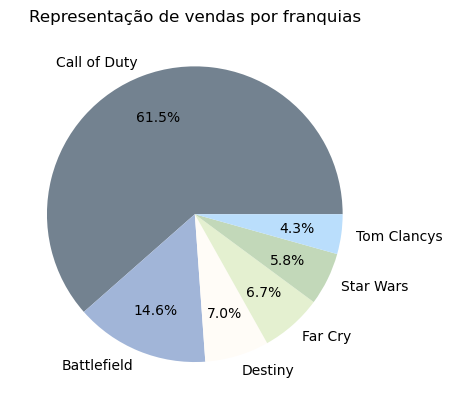

In [10]:
# Criando a representação gráfica

# Definindo as labels do gráfico
Franquia = ['Call of Duty', 'Battlefield', 'Destiny', 'Far Cry', 'Star Wars', 'Tom Clancys']

# Definindo os valores das fatias, com base nas vendas em franquias_global_sales
Vendas = franquias_global_sales

# Definição de cores
colors = ['#738290', '#A1B5D8', '#FFFCF7', '#E4F0D0', '#C2D8B9', '#BADEFC' ]

# Pie Chart
plt.pie(Vendas, colors=colors, labels=Franquia, autopct='%1.1f%%', pctdistance=0.70)

# Adicionando o título
plt.title('Representação de vendas por franquias')

# Plotando o gráfico
plt.show()


In [11]:
tabela_franquias = pd.DataFrame({
    "Franquia": ["Battlefield", "Destiny", "Far Cry", "Star Wars", "Tom Clancy's"],
    "Vendas Globais": [franquias_global_sales[1], franquias_global_sales[2], franquias_global_sales[3], franquias_global_sales[4], franquias_global_sales[5]]})
tabela_franquias.style \
  .format(precision=2, thousands=".", decimal=".") \
  .format_index(str.upper, axis=1)

,FRANQUIA,VENDAS GLOBAIS
0,Battlefield,19.41
1,Destiny,9.29
2,Far Cry,8.92
3,Star Wars,7.67
4,Tom Clancy's,5.76


### As outras franquias que se destacaram na lista foram: Battlefield, Destiny, Far Cry, Star Wars e Tom Clancy's.

<center><img title="divisor" width="800" alt="divisor" src="https://64.media.tumblr.com/374d6cccba5954a0fd521b259ebfa103/96bee921bd3fa00d-84/s2048x3072/fb8ae092e883c6d0921f8e1866e6b07d23e10d4b.pnj"></center>